In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
        print(os.path.join(dirname))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input
/kaggle/input/microsoft-catsvsdogs-dataset
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat


In [2]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

{'Cat': 12501, 'Dog': 12501}


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


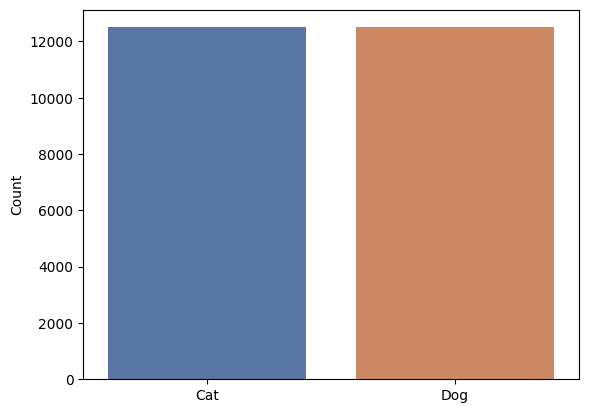

In [3]:
root_directory = '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages'
cls_name=['Cat','Dog' ]
data = {n: len(os.listdir(os.path.join(root_directory, n))) for n in cls_name}
print(data)

sns.barplot(x=list(data.keys()), y=list(data.values()),palette="deep")
plt.ylabel('Count')
plt.show()

In [4]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

# Define the transformation
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Create the dataset
dataset = datasets.ImageFolder(root_directory, transform=transform)

# Filter out images you want to exclude
filtered_indices = []
def meets_criteria(img_path):
    files_to_exclude = ['666.jpg','11702.jpg']
    
    # Get the base name of the image path (i.e., the file name)
    img_filename = os.path.basename(img_path) 
    # Check if the image filename is not in the list of files to exclude
    return img_filename not in files_to_exclude

for idx, (img_path, label) in enumerate(dataset.samples):
    # Example: Exclude images with specific conditions
    if meets_criteria(img_path):
        filtered_indices.append(idx)

# Exclude filtered indices from the dataset
filtered_dataset = torch.utils.data.Subset(dataset, indices=filtered_indices)

# Specify the split ratios
train_ratio = 0.7
test_ratio = 0.15
val_ratio = 0.15

# Calculate the number of samples for each split
num_samples = len(filtered_dataset)
num_train = int(train_ratio * num_samples)
num_test = int(test_ratio * num_samples)
num_val = num_samples - num_train - num_test

# Use random_split to split the filtered dataset
train_data, test_val_data = random_split(filtered_dataset, [num_train, num_test + num_val])
test_data, val_data = random_split(test_val_data, [num_test, num_val])

# Create data loaders
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)
val_loader = DataLoader(val_data, batch_size=32, shuffle=False)

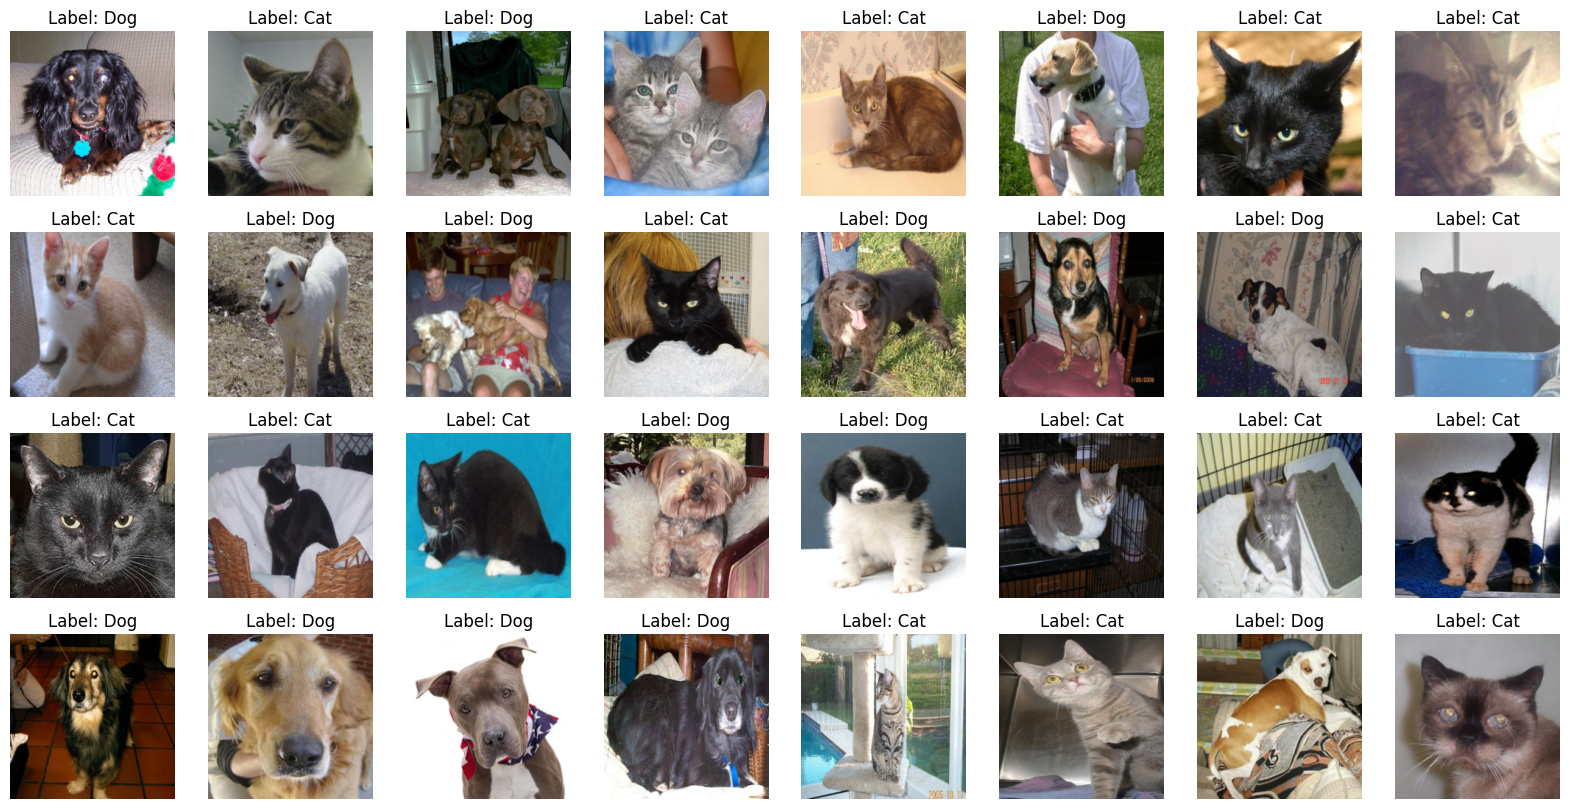

In [5]:
def show_images(images, labels):
    plt.figure(figsize=(20, 10))
    num_images = len(images)
    
    for i in range(num_images):
        plt.subplot(int(num_images/8),8, i + 1)
        plt.imshow(np.transpose(images[i], (1, 2, 0)))
        plt.title(f"Label: {cls_name[labels[i]]}")
        plt.axis('off')
    
    plt.show()

for batch, (X_train, y_train) in enumerate(train_loader):
    break

show_images(X_train, y_train)

In [6]:
X_train.shape, y_train.shape

(torch.Size([32, 3, 224, 224]), torch.Size([32]))

In [7]:
import torch.nn as nn
import torch.optim as optim

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=8, kernel_size=(3, 3), stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=(2, 2), stride=2)

        self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=(3, 3), stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=(2, 2), stride=2)
        
        self.conv3 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=(3, 3), stride=1, padding=1)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=(2, 2), stride=2)
        
        self.conv4 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(3, 3), stride=1, padding=1)
        self.relu4 = nn.ReLU()
        self.pool4 = nn.MaxPool2d(kernel_size=(2, 2), stride=2)

        self.flatten = nn.Flatten()

        self.fc1 = nn.Linear(12544, 64)  # Adjust the input size based on the output size of the last convolution
        self.relu5 = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)
        self.relu6 = nn.ReLU()
        self.fc3 = nn.Linear(32, 16)
        self.relu7 = nn.ReLU()
        self.output_layer = nn.Linear(16, 2) 
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)

        x = self.conv3(x)
        x = self.relu3(x)
        x = self.pool3(x)
        
        x = self.conv4(x)
        x = self.relu4(x)
        x = self.pool4(x)

        x = self.flatten(x)
        
        x = self.fc1(x)
        x = self.relu5(x)
        x = self.fc2(x)
        x = self.relu6(x)
        x = self.fc3(x)
        x = self.relu7(x)

        x = self.output_layer(x)

        return x

In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [9]:
model = SimpleCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005, weight_decay=0.00001)

num_epochs = 10
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    correct_train = 0
    total = 0

    # Initialize running loss as a tensor with zero value
    running_loss = torch.zeros(1, device=device, requires_grad=True)
    
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        _, predicted_train = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()

        # Update the running loss using the tensor addition with detached tensor
        running_loss = running_loss + loss

        loss.backward()
        optimizer.step()

    avg_loss = running_loss.item() / len(train_loader)
    train_losses.append(avg_loss)

    train_accuracy = correct_train / total
    train_accuracies.append(train_accuracy)

    model.eval()
    correct_val = 0
    total_val = 0

    # Initialize validation running loss as a tensor with zero value
    val_running_loss = torch.zeros(1, device=device, requires_grad=False)

    with torch.no_grad():
        for inputs_val, labels_val in val_loader:
            inputs_val, labels_val = inputs_val.to(device), labels_val.to(device)
            outputs_val = model(inputs_val)
            val_loss = criterion(outputs_val, labels_val)
            _, predicted_val = torch.max(outputs_val.data, 1)
            total_val += labels_val.size(0)
            correct_val += (predicted_val == labels_val).sum().item()
            
            # Update the validation running loss using the tensor addition with detached tensor
            val_running_loss = val_running_loss.detach() + val_loss

        val_avg_loss = val_running_loss.item() / len(val_loader)
        val_losses.append(val_avg_loss)

        val_accuracy = correct_val / total_val
        val_accuracies.append(val_accuracy)
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_loss:.4f}, Validation Loss: {val_avg_loss:.4f}, Train Accuracy: {train_accuracy * 100:.2f}%, Validation Accuracy: {val_accuracy * 100:.2f}%')

/opt/conda/lib/python3.10/site-packages/PIL/TiffImagePlugin.py:864: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Epoch [1/10], Train Loss: 0.6758, Validation Loss: 0.6506, Train Accuracy: 57.54%, Validation Accuracy: 61.95%
Epoch [2/10], Train Loss: 0.6140, Validation Loss: 0.5800, Train Accuracy: 66.58%, Validation Accuracy: 69.95%
Epoch [3/10], Train Loss: 0.5704, Validation Loss: 0.5662, Train Accuracy: 70.64%, Validation Accuracy: 70.51%
Epoch [4/10], Train Loss: 0.5307, Validation Loss: 0.5219, Train Accuracy: 73.50%, Validation Accuracy: 74.53%
Epoch [5/10], Train Loss: 0.4951, Validation Loss: 0.4856, Train Accuracy: 75.90%, Validation Accuracy: 76.32%
Epoch [6/10], Train Loss: 0.4553, Validation Loss: 0.4722, Train Accuracy: 78.38%, Validation Accuracy: 77.71%
Epoch [7/10], Train Loss: 0.4195, Validation Loss: 0.4718, Train Accuracy: 80.75%, Validation Accuracy: 77.76%
Epoch [8/10], Train Loss: 0.3820, Validation Loss: 0.4707, Train Accuracy: 82.63%, Validation Accuracy: 77.79%
Epoch [9/10], Train Loss: 0.3461, Validation Loss: 0.4845, Train Accuracy: 84.72%, Validation Accuracy: 77.87%
E

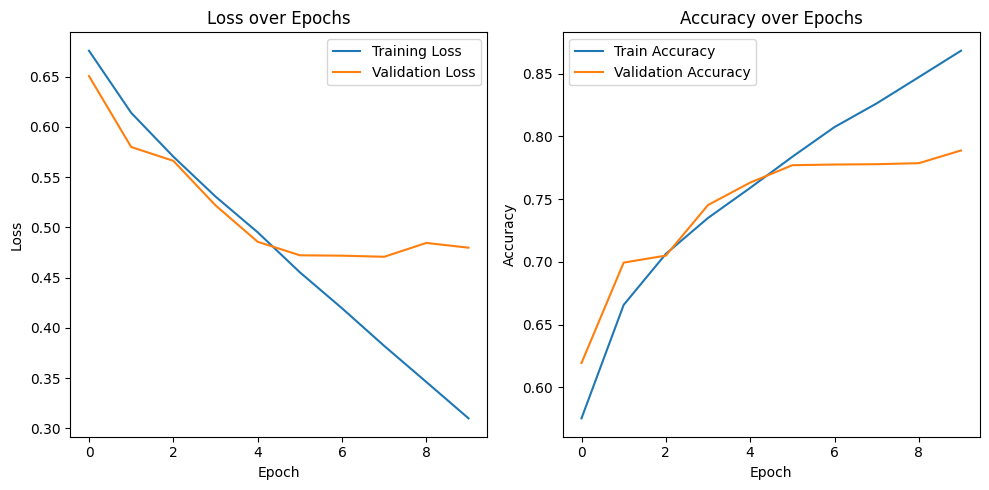

In [10]:
plt.figure(figsize=(10, 5)) 
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

In [11]:
model.eval()
correct_test = 0
total_test = 0
true_labels=[]
predict_label=[]
predicted_probas=[]
with torch.inference_mode():
    for inputs_test, labels_test in test_loader:
        true_labels.append(labels_test)
        inputs_test, labels_test = inputs_test.to(device), labels_test.to(device)
        outputs_test = model(inputs_test)
        probas = nn.functional.softmax(outputs_test, dim=1)
        predicted_probas.append(probas)
        _, predicted_test = torch.max(probas.data, 1)
        predict_label.append(predicted_test)

In [12]:
true_labels = torch.cat(true_labels, dim=0)
predict_label= torch.cat(predict_label, dim=0)
predicted_probas= torch.cat(predicted_probas, dim=0)
predict_label=predict_label.to('cpu')
predicted_probas=predicted_probas.to('cpu')

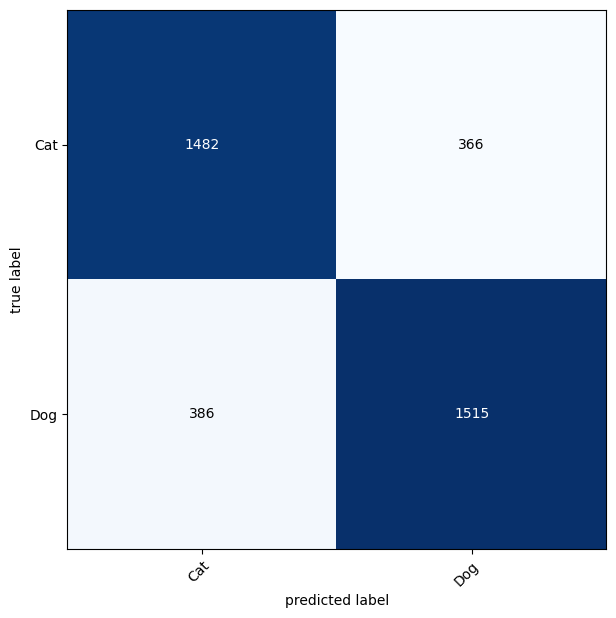

In [13]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes=len(cls_name), task='Binary')
confmat_tensor = confmat(preds=predict_label,
                         target=true_labels)

fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), 
    class_names=cls_name,
    figsize=(10, 7)
);

In [14]:
from sklearn.metrics import classification_report,roc_curve,auc

# Generate the classification report
print(classification_report(true_labels, predict_label))

              precision    recall  f1-score   support

           0       0.79      0.80      0.80      1848
           1       0.81      0.80      0.80      1901

    accuracy                           0.80      3749
   macro avg       0.80      0.80      0.80      3749
weighted avg       0.80      0.80      0.80      3749



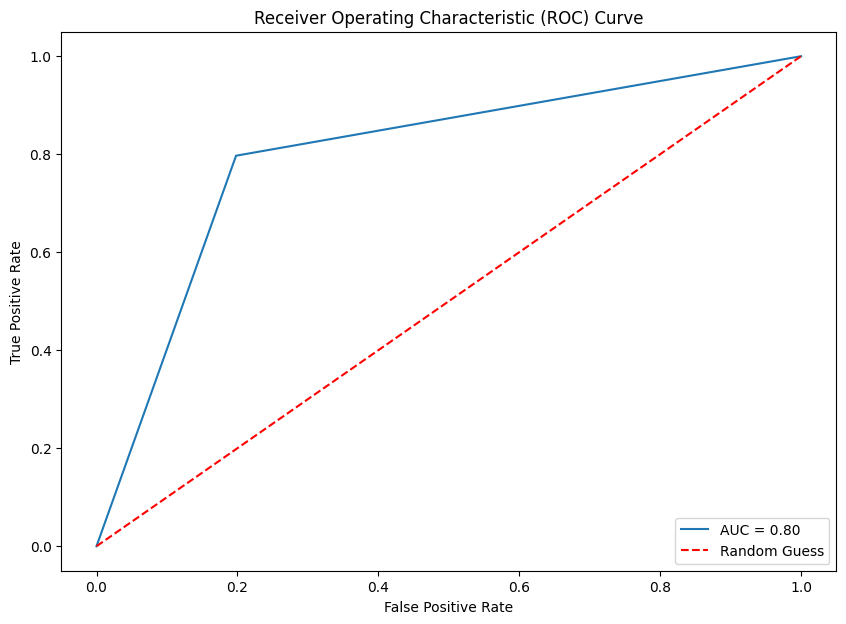

In [15]:
plt.figure(figsize=(10, 7))

fpr, tpr, _ = roc_curve(true_labels, predict_label)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')


plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()